In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PLOT_SIZE = 15, 5
    
    
def plot(signals):
    plt.figure(figsize=PLOT_SIZE)
    for points, label in signals:
        plt.plot(points, label=label)
    plt.legend()
    plt.show()

### Часть 1

In [3]:
LEN = 1000
IMPULSE_LEN = 100
IMPULSE_DELAY = 300
IMPULSE_AMP_SENT = 5
IMPULSE_AMP_RECEIVED = 1

x, y = np.zeros(LEN), np.zeros(LEN)
x[:IMPULSE_LEN] = IMPULSE_AMP_SENT
y[IMPULSE_DELAY:IMPULSE_DELAY + IMPULSE_LEN] = IMPULSE_AMP_RECEIVED

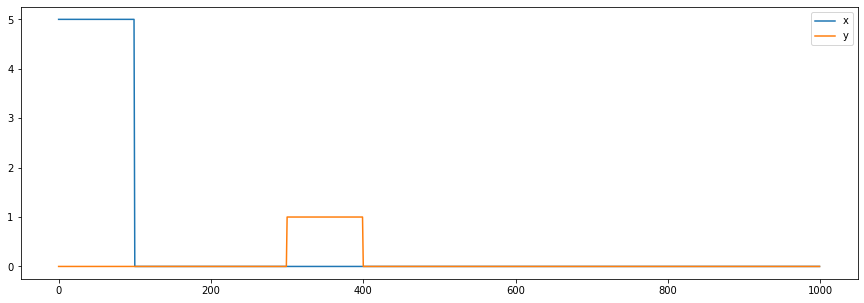

In [4]:
plot([(x, 'x'), (y, 'y')])

In [5]:
def correlation(f, g):
    return np.convolve(f[::-1], g)[LEN - 1:]

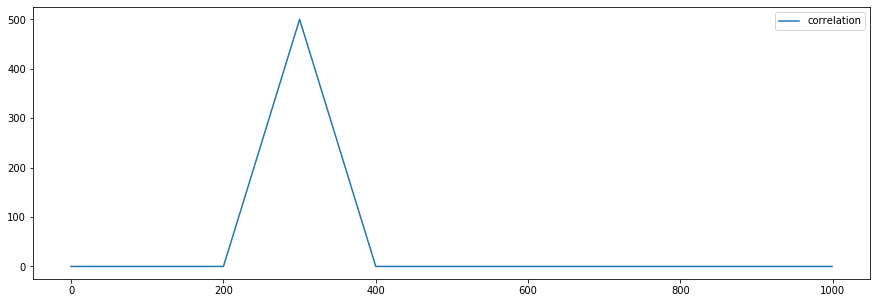

In [6]:
plot([(correlation(x, y), 'correlation')])

In [7]:
DOUBLE_IMPULSE_LEN = 150

double_impulse = np.zeros(DOUBLE_IMPULSE_LEN)
double_impulse[:50] = 1
double_impulse[100:] = 1

x_double, y_double = np.zeros(LEN), np.zeros(LEN)
x_double[:DOUBLE_IMPULSE_LEN] = double_impulse * IMPULSE_AMP_SENT
y_double[IMPULSE_DELAY:IMPULSE_DELAY + DOUBLE_IMPULSE_LEN] = double_impulse * IMPULSE_AMP_RECEIVED

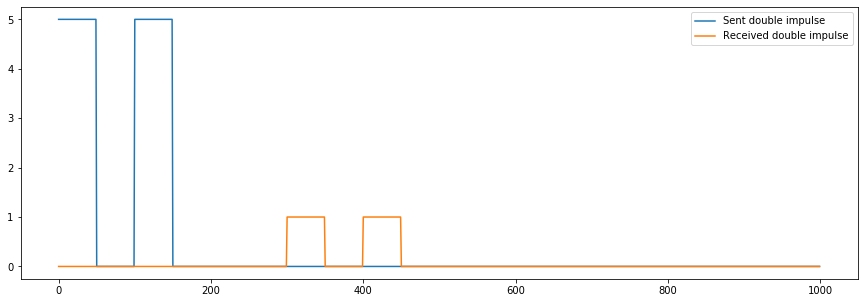

In [8]:
plot([
    (x_double, 'Sent double impulse'), 
    (y_double, 'Received double impulse')
])

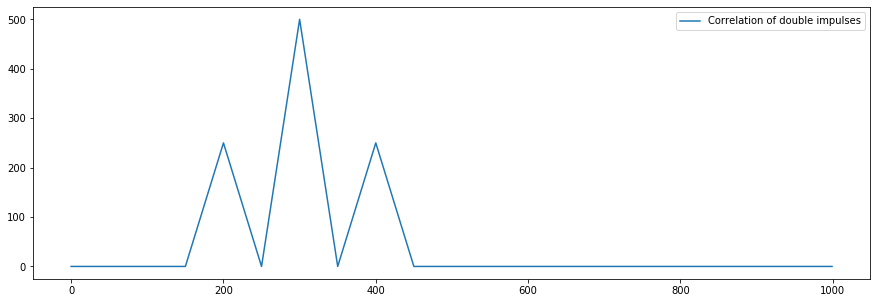

In [9]:
plot([(correlation(x_double, y_double), 'Correlation of double impulses')])

### Часть 2

In [10]:
def add_noise(signal, snr):
    signal_sqr_amp = np.mean(signal ** 2)
    noise_sqr_amp = signal_sqr_amp / (10 ** (snr / 10))
    noise = np.random.normal(0, noise_sqr_amp ** .5, signal.shape)
    return signal + noise

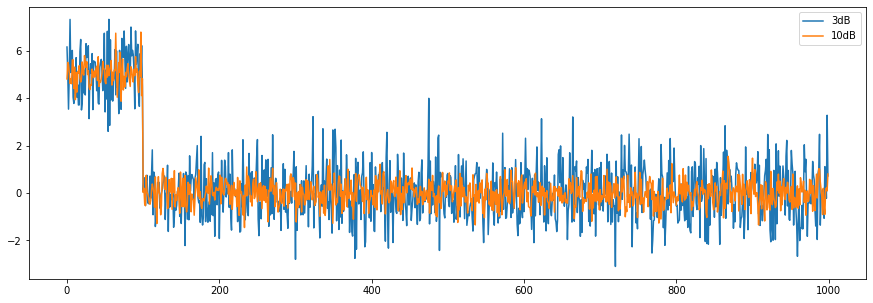

In [11]:
plot((
    (add_noise(x, 3), '3dB'),
    (add_noise(x, 10), '10dB')
))

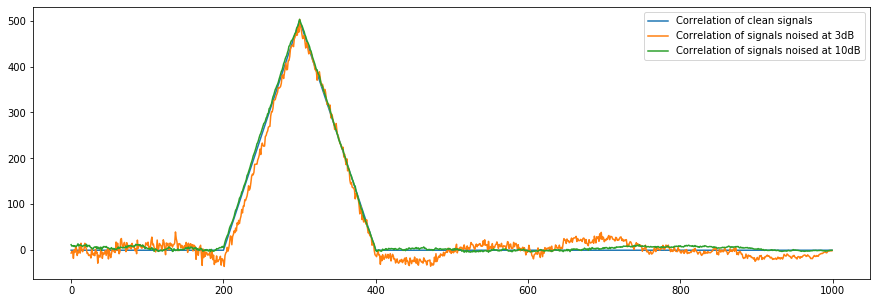

In [12]:
plot([
    (correlation(x, y), 'Correlation of clean signals'),
    (correlation(add_noise(x, 3), add_noise(y, 3)), 'Correlation of signals noised at 3dB'),
    (correlation(add_noise(x, 10), add_noise(y, 10)), 'Correlation of signals noised at 10dB')
])

In [13]:
from scipy.signal import chirp

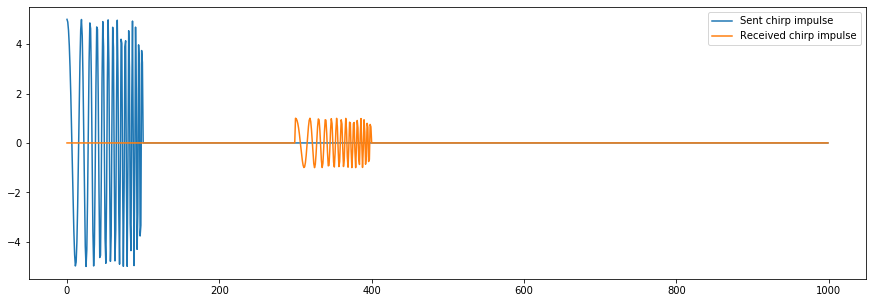

In [14]:
chirp_impulse = chirp(np.linspace(0, 4 * np.pi, 100), .25, 4 * np.pi, 2)
x_chirp, y_chirp = np.zeros(LEN), np.zeros(LEN)
x_chirp[:IMPULSE_LEN] = chirp_impulse * IMPULSE_AMP_SENT
y_chirp[IMPULSE_DELAY:IMPULSE_DELAY + IMPULSE_LEN] = chirp_impulse * IMPULSE_AMP_RECEIVED
plot([(x_chirp, 'Sent chirp impulse'), (y_chirp, 'Received chirp impulse')])

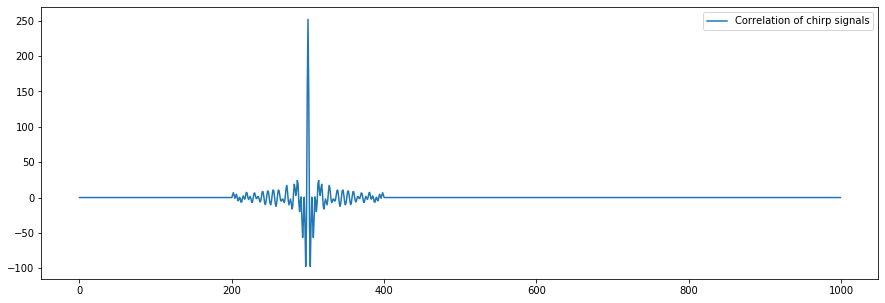

In [15]:
plot([(correlation(x_chirp, y_chirp), 'Correlation of chirp signals')])

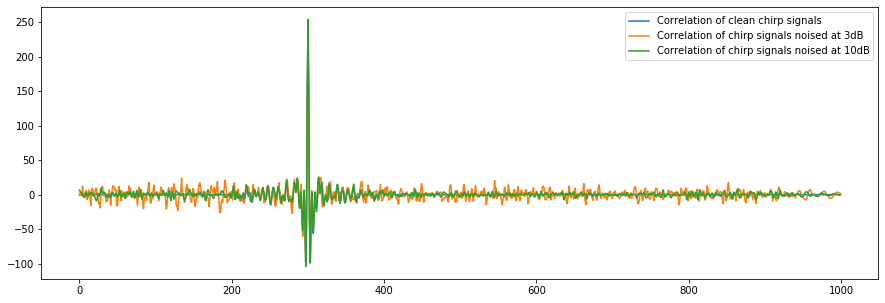

In [16]:
plot([
    (correlation(x_chirp, y_chirp), 'Correlation of clean chirp signals'),
    (correlation(add_noise(x_chirp, 3), add_noise(y_chirp, 3)), 'Correlation of chirp signals noised at 3dB'),
    (correlation(add_noise(x_chirp, 10), add_noise(y_chirp, 10)), 'Correlation of chirp signals noised at 10dB')
])

### Часть 3

In [17]:
eps = 1e-6
t = np.arange(0, 1 + eps, 1 / 2000)

In [18]:
f1, f2 = 100, 400
x1 = np.exp(2 * np.pi * f1 * t * 1j)
x2 = np.exp(2 * np.pi * f2 * t * 1j)

In [19]:
def wave_to_spectrum(wave):
    return np.abs(np.fft.fft(wave))

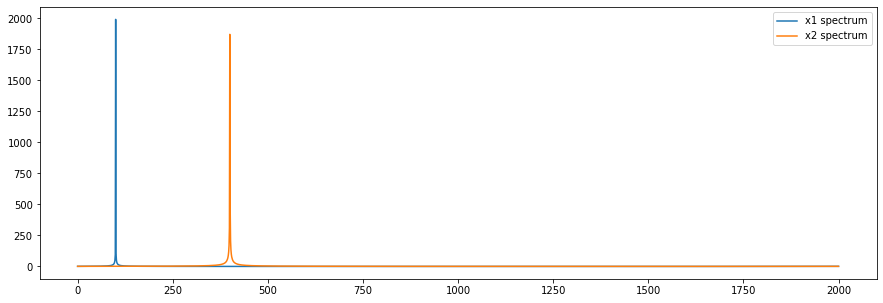

In [20]:
x1_spectrum = wave_to_spectrum(x1)
x2_spectrum = wave_to_spectrum(x2)
plot([
    (x1_spectrum, 'x1 spectrum'),
    (x2_spectrum, 'x2 spectrum')
])

### Часть 4

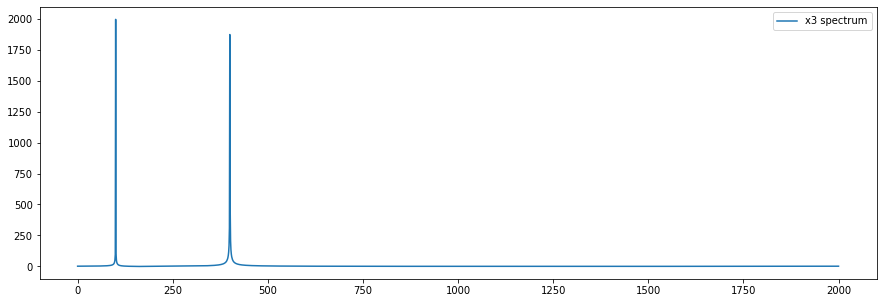

In [21]:
x3 = x1 + x2
x3_spectrum = wave_to_spectrum(x3)
plot([(x3_spectrum, 'x3 spectrum')])

При сложении волн спектры суммруются, поскольку волны можно представить как сумму форм колебаний, умноженых на амплитуды.

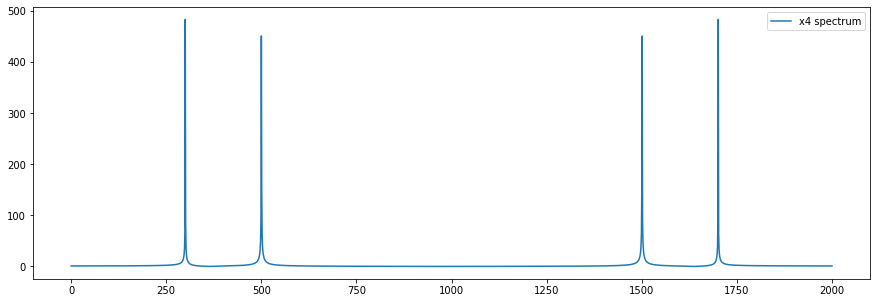

In [22]:
x4 = x1.real * x2.real
x4_spectrum = wave_to_spectrum(x4)
plot([(x4_spectrum, 'x4 spectrum')])

При умножении волн из-за свойств тригонометрических функций в спектре появляются частоты, соответствующие сумме и разности исходных частот.

БПФ вычисляет значения многочлена в комплексных корнях из 1, а а re(exp(ix)) == re(exp(i(2pi-x))). Из-за этого в правой половине спектра появляются отражения пиков. Поскольку по теореме Котельникова частоты, превышающие полоину частоты дискретизации передаются неправильно, их можно игнорировать.

### Часть 5

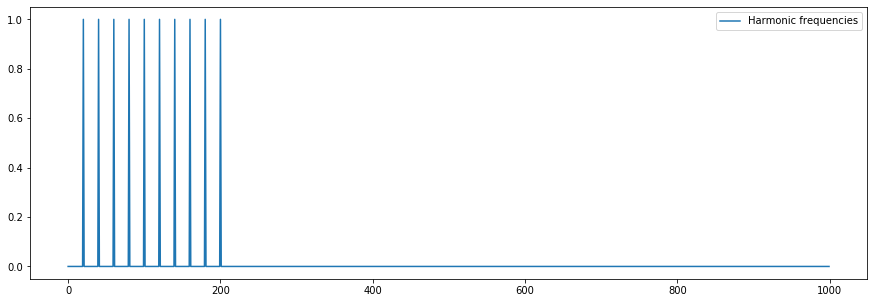

In [23]:
harmonic_freq_range = np.zeros(1000)
harmonic_active_freqs = np.arange(20, 201, 20)
harmonic_freq_range[harmonic_active_freqs] = 1
plot([(harmonic_freq_range, 'Harmonic frequencies')])

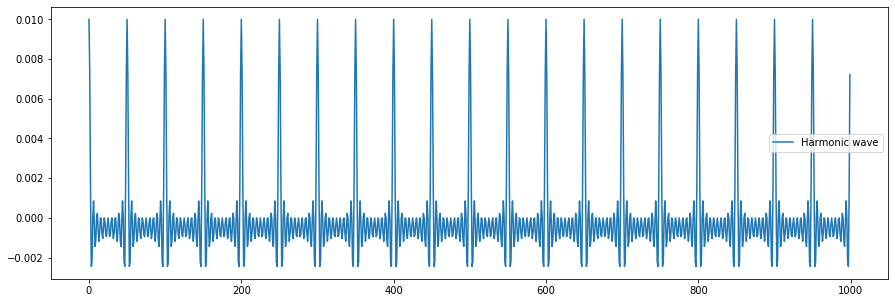

In [24]:
harmonic_wave = np.fft.ifft(harmonic_freq_range)
plot([(harmonic_wave.real, 'Harmonic wave')])

In [25]:
from scipy import signal

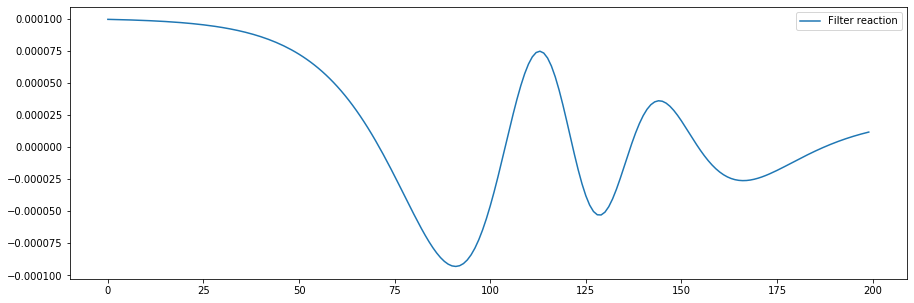

In [26]:
b, a = signal.butter(6, 60, fs=1000)
plot([(signal.freqs(b, a)[1].real, 'Filter reaction')])

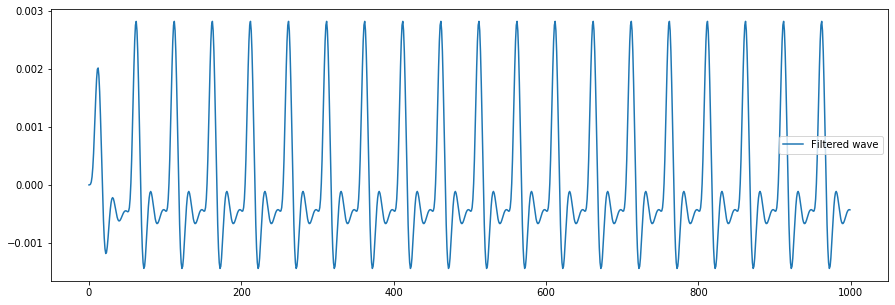

In [27]:
filtered_harmonic_wave = signal.lfilter(b, a, harmonic_wave)
plot([(filtered_harmonic_wave.real, 'Filtered wave')])

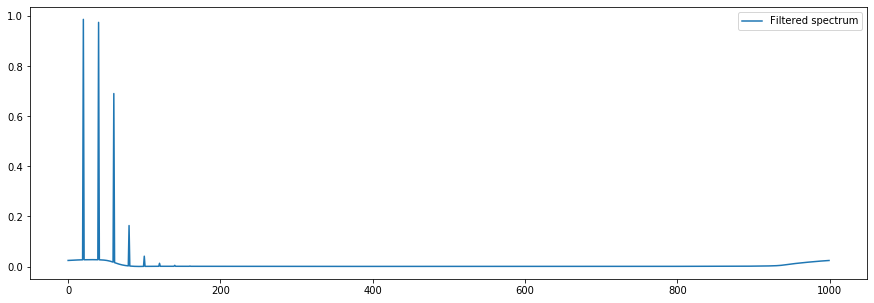

In [28]:
filtered_harmonic_spectrum = wave_to_spectrum(filtered_harmonic_wave)
plot([(filtered_harmonic_spectrum, 'Filtered spectrum')])